In [1]:
import pandas as pd
import time

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegressionCV,PassiveAggressiveClassifier,RidgeClassifierCV,SGDClassifier,Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

from sklearn.model_selection import KFold, cross_validate

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('ggplot')
sns.set_style('white')

In [2]:
df_train_copy = pd.read_csv('../datasets/raw_datasets/df_train_copy_preprocessed.csv')
df_test = pd.read_csv('../datasets/raw_datasets/df_test_preprocessed.csv')
X_train = pd.read_csv('../datasets/raw_datasets/X_train.csv')
X_val = pd.read_csv('../datasets/raw_datasets/X_val.csv')
y_train = pd.read_csv('../datasets/raw_datasets/y_train.csv')
y_val = pd.read_csv('../datasets/raw_datasets/y_val.csv')

In [3]:
# Training Features
features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group',
       'Cabin_number', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C',
       'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G',
       'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S']

In [4]:
#Machine Learning Algorithm (MLA) Selection and Initialization
models = [
    # Discriminant Analysis Methods
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),

    # Ensemble Methods
    AdaBoostClassifier(),
    BaggingClassifier(),
    CatBoostClassifier(verbose=False),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    LGBMClassifier(verbose=0),
    RandomForestClassifier(),
    XGBClassifier(),

    # Gaussian Processes Methods
    GaussianProcessClassifier(),
    
    # Linear Methods
    LogisticRegressionCV(),
    PassiveAggressiveClassifier(),
    Perceptron(),
    RidgeClassifierCV(),
    SGDClassifier(),
    
    # Navies Bayes Methods
    BernoulliNB(),
    GaussianNB(),
    
    # Nearest Neighbor Methods
    KNeighborsClassifier(),
    
    # SVM Methods
    LinearSVC(),
    NuSVC(probability=True),
    SVC(probability=True),
    
    # Trees Methods
    DecisionTreeClassifier(),
    ExtraTreeClassifier()
    ]

# create table to compare MLA metrics
compare_columns = ['Model','Mean Model Train Accuracy', 'Mean Model Test Accuracy', 'Lower Bound Model Test Accuracy (Mean-3*STD)', 'Upper Bound Model Test Accuracy (Mean+3*STD)', 'Mean Model Training Time', 'Total Model CrossValidation Time']
model_compare = pd.DataFrame(columns = compare_columns)

# Splitting data for cross-validation using KFold splitting
kf = KFold(n_splits=10, shuffle=True, random_state=619)

# Adding Model Results row wise in model_compare dataframe
index = 0
for model in models:

    # Model Name
    model_compare.loc[index, 'Model'] = model.__class__.__name__
    
    start_time = time.time()
    cv_results = cross_validate(model, df_train_copy[features], df_train_copy["Transported"], cv  = kf, return_train_score=True )
    end_time = time.time()

    model_compare.loc[index, 'Mean Model Train Accuracy'] = cv_results['train_score'].mean()
    model_compare.loc[index, 'Mean Model Test Accuracy'] = cv_results['test_score'].mean()   

    # To check how much accuracy might vary 
    model_compare.loc[index, 'Lower Bound Model Test Accuracy (Mean-3*STD)'] = cv_results['test_score'].mean() - cv_results['test_score'].std()*3
    model_compare.loc[index, 'Upper Bound Model Test Accuracy (Mean+3*STD)'] = cv_results['test_score'].mean() + cv_results['test_score'].std()*3

    model_compare.loc[index, 'Mean Model Training Time'] = cv_results['fit_time'].mean()
    model_compare.loc[index, 'Total Model CrossValidation Time'] = end_time - start_time
    
    index = index + 1
    
# Print the model results in descending order to get the best performing model
model_compare.sort_values('Mean Model Test Accuracy', ascending = False, inplace = True)
model_compare

/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ahmad/min

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ahmad/miniconda3/envs/github_classification/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

,Model,Mean Model Train Accuracy,Mean Model Test Accuracy,Lower Bound Model Test Accuracy (Mean-3*STD),Upper Bound Model Test Accuracy (Mean+3*STD),Mean Model Training Time,Total Model CrossValidation Time
7,LGBMClassifier,0.891138,0.814446,0.779446,0.849446,0.272024,3.150363
4,CatBoostClassifier,0.881795,0.811916,0.772946,0.850885,4.898367,49.194494
9,XGBClassifier,0.93351,0.80467,0.764072,0.845267,9.461103,95.217132
6,GradientBoostingClassifier,0.824993,0.80352,0.763939,0.8431,2.818624,28.587173
8,RandomForestClassifier,0.999668,0.801563,0.76557,0.837555,2.254583,25.063822
2,AdaBoostClassifier,0.804517,0.798457,0.768173,0.828741,0.398847,4.524467
3,BaggingClassifier,0.984509,0.78845,0.760132,0.816768,0.478313,5.055389
5,ExtraTreesClassifier,0.999693,0.787876,0.746297,0.829454,0.98716,11.717645
14,RidgeClassifierCV,0.782277,0.782007,0.754386,0.809629,0.026053,0.344859
0,LinearDiscriminantAnalysis,0.782251,0.781892,0.752809,0.810976,0.032588,0.422008


Text(0, 0.5, 'Algorithm')

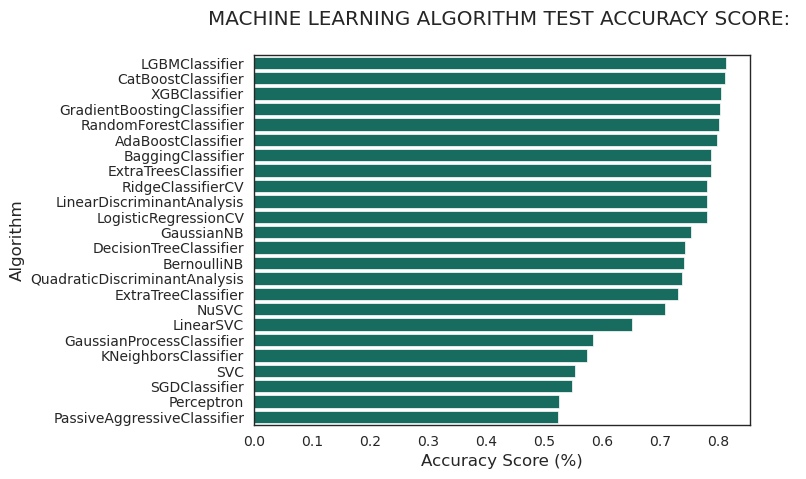

In [5]:
sns.barplot(x='Mean Model Test Accuracy', y = 'Model', data = model_compare, color = "#097969")

plt.title('MACHINE LEARNING ALGORITHM TEST ACCURACY SCORE: \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')